In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest

In [2]:
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs

n_samples = 500
outliers_fraction = 0.05
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

blobs_params = dict(random_state = 42, n_samples = n_inliers, n_features = 2)

X = make_blobs(centers = [[0, 0], [0, 0]], cluster_std = 0.5, **blobs_params)[0]

rng = np.random.RandomState(42)

X = np.concatenate([X, rng.uniform(low = -6, high = 6, size = (n_outliers, 2))], axis=0)

In [4]:
iForest = IsolationForest(n_estimators = 20, verbose = 1)
iForest.fit(X)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


IsolationForest(n_estimators=20, verbose=1)

In [5]:
predict = iForest.predict(X)

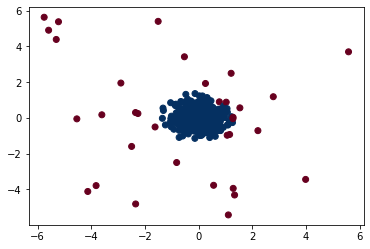

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=predict, cmap='RdBu')

In [7]:
pred_score = -1 * iForest.score_samples(X)

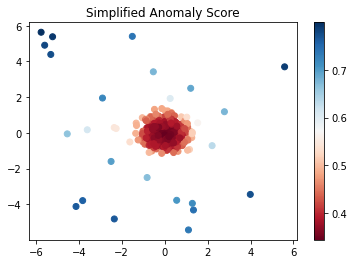

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=pred_score, cmap='RdBu')
plt.title('Simplified Anomaly Score')
plt.colorbar()
plt.show()